This notebook aims at performing EDA on the dataset DPE Logements existants --> justification : https://www.service-public.gouv.fr/particuliers/vosdroits/F16096

# IMPORT LIBRAIRIES

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import time
import geopandas as gpd
import math
from sklearn.model_selection import train_test_split

# IMPORT DATA

In [23]:
dpe_data = pd.read_csv("data/dpe03existant_2025.csv", sep=",")
display(dpe_data.head())

,numero_dpe,date_derniere_modification_dpe,date_etablissement_dpe,modele_dpe,version_dpe,methode_application_dpe,etiquette_dpe,etiquette_ges,type_batiment,annee_construction,...,conso_ef_installation_ecs_n1,nombre_logements_desservis_par_installation_ecs_n1,surface_habitable_desservie_par_installation_ecs_n1,type_installation_solaire_n1,production_ecs_solaire_installation_n1,facteur_couverture_solaire_n1,type_generateur_n1_ecs_n1,type_energie_generateur_n1_ecs_n1,usage_generateur_n1_ecs_n1,description_generateur_n1_ecs_n1
0,2593E1637025G,2025-05-17,2025-05-17,DPE 3CL 2021 méthode logement,2.4,dpe appartement généré à partir des données DP...,B,A,appartement,1977,...,49323.4,26.7,1910.7,Non affecté,NaN,NaN,Ballon électrique à accumulation vertical Caté...,Électricité,ecs,Chauffe-eau vertical
1,2531E0365502D,2025-04-29,2025-02-03,DPE 3CL 2021 méthode logement,2.4,dpe appartement individuel,E,E,appartement,1965,...,1654.0,1.0,51.3,Non affecté,NaN,NaN,Ballon électrique à accumulation vertical Caté...,Électricité,ecs,Chauffe-eau vertical
2,2529E0131493S,2025-04-29,2025-01-15,DPE 3CL 2021 méthode logement,2.4,dpe appartement généré à partir des données DP...,D,D,appartement,1978,...,1950.8,1.0,214.4,Non affecté,NaN,NaN,Chaudière gaz basse température après 2015,Gaz naturel,chauffage + ecs,Gaz Naturel - Chaudière gaz basse température ...
3,2545E0068331A,2025-04-29,2025-01-09,DPE 3CL 2021 méthode logement,2.4,dpe appartement généré à partir des données DP...,D,D,appartement,1960,...,116851.4,69.0,3458.0,Non affecté,NaN,NaN,Chauffe-eau gaz à production instantanée après...,Gaz naturel,ecs,Chauffe-eau gaz à production instantannée
4,2590E1165928A,2025-04-29,2025-04-04,DPE 3CL 2021 méthode logement,2.4,dpe appartement généré à partir des données DP...,C,C,appartement,1987,...,2066.1,1.0,10544.0,Non affecté,NaN,NaN,Chaudière gaz à condensation 2001-2015,Gaz naturel,chauffage + ecs,Gaz Naturel - Chaudière gaz à condensation ins...


In [24]:
dpe_data.describe()

,version_dpe,annee_construction,hauteur_sous_plafond,nombre_appartement,nombre_niveau_immeuble,nombre_niveau_logement,surface_habitable_immeuble,surface_habitable_logement,code_region_ban,coordonnee_cartographique_x_ban,...,cout_refroidissement,cout_eclairage,cout_auxiliaires,conso_chauffage_installation_chauffage_n1,type_generateur_chauffage_principal_ecs,conso_ef_installation_ecs_n1,nombre_logements_desservis_par_installation_ecs_n1,surface_habitable_desservie_par_installation_ecs_n1,production_ecs_solaire_installation_n1,facteur_couverture_solaire_n1
count,6.745310e+05,674531.000000,674531.000000,584158.000000,381739.000000,674531.000000,4.916600e+05,674531.000000,674531.000000,6.745310e+05,...,674531.00000,674531.000000,674531.000000,6.744790e+05,0.0,6.735160e+05,673516.000000,673516.000000,1.701100e+04,19585.000000
mean,2.400000e+00,1975.485978,2.597930,41.948796,5.901776,1.150087,4.206043e+03,58.706494,43.567442,6.955573e+05,...,1.31264,38.082355,155.579293,1.399401e+05,NaN,5.116184e+04,8.045780,1276.355939,2.462195e+07,0.347506
std,2.216318e-11,33.309566,4.060229,68.284999,3.556703,2.877335,1.592409e+05,622.783406,30.489849,1.937374e+05,...,8.35232,238.737614,1123.015813,3.669840e+05,NaN,1.332661e+05,34.396725,2924.250122,2.676887e+07,0.073570
min,2.400000e+00,1200.000000,0.100000,1.000000,1.000000,1.000000,0.000000e+00,2.000000,0.000000,1.248625e+05,...,0.00000,0.900000,0.000000,0.000000e+00,NaN,0.000000e+00,1.000000,0.100000,5.169900e+03,0.000000
25%,2.400000e+00,1961.000000,2.500000,1.000000,4.000000,1.000000,1.099600e+03,42.000000,11.000000,6.301197e+05,...,0.00000,23.600000,43.000000,2.844700e+03,NaN,1.659400e+03,1.000000,48.500000,1.500673e+06,0.300000
50%,2.400000e+00,1975.000000,2.500000,20.000000,5.000000,1.000000,2.176000e+03,59.000000,44.000000,6.560168e+05,...,0.00000,34.800000,77.200000,7.213200e+03,NaN,2.048400e+03,1.000000,95.100000,1.709351e+07,0.300000
75%,2.400000e+00,2000.000000,2.500000,54.000000,7.000000,1.000000,4.162000e+03,71.700000,76.000000,8.468074e+05,...,0.00000,45.300000,132.000000,1.063077e+05,NaN,2.767260e+04,1.000000,1248.000000,3.639018e+07,0.400000
max,2.400000e+00,2099.000000,2019.000000,10572.000000,56.000000,1664.000000,8.464204e+07,511002.000000,94.000000,1.241817e+06,...,537.70000,193182.400000,883711.500000,8.108190e+06,NaN,4.242586e+06,10572.000000,511002.000000,1.408685e+08,1.000000


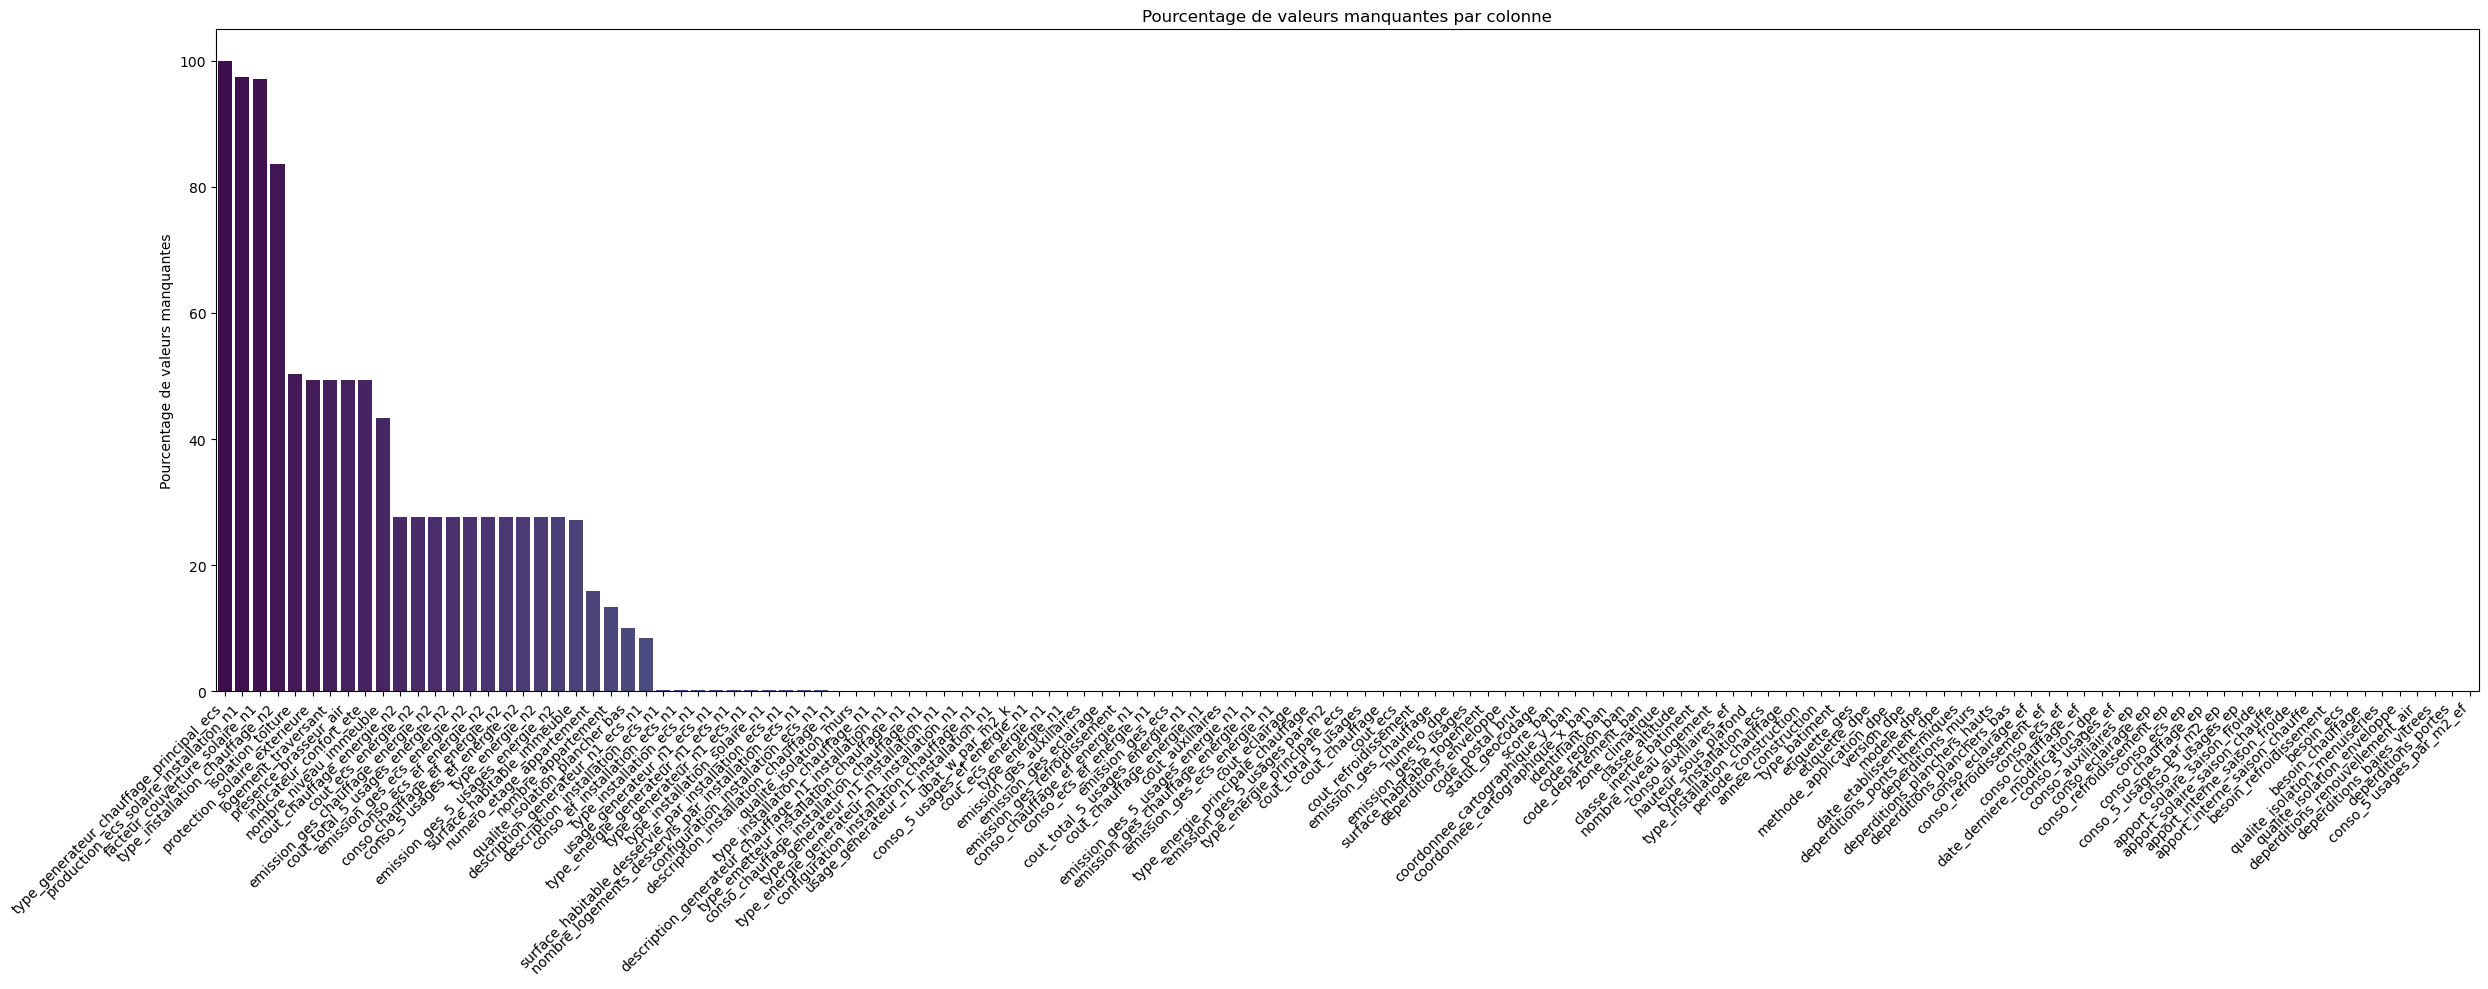

In [25]:
missing_percent = (dpe_data.isna().sum()/len(dpe_data)) * 100
missing_percent = missing_percent.sort_values(ascending=False)

plt.figure(figsize=(25,10))
sns.barplot(x=missing_percent.index, y=missing_percent.values, palette="viridis")
plt.xticks(rotation=45, ha="right")
plt.ylabel("Pourcentage de valeurs manquantes")
plt.title("Pourcentage de valeurs manquantes par colonne")
plt.tight_layout()
plt.show()

In [26]:
#Selecting columns to remove
remove_columns=missing_percent[missing_percent>0]
remove_columns

type_generateur_chauffage_principal_ecs                100.000000
production_ecs_solaire_installation_n1                  97.478100
facteur_couverture_solaire_n1                           97.096501
type_installation_chauffage_n2                          83.652345
isolation_toiture                                       50.283975
protection_solaire_exterieure                           49.370155
logement_traversant                                     49.370155
presence_brasseur_air                                   49.370155
indicateur_confort_ete                                  49.370155
nombre_niveau_immeuble                                  43.406752
cout_chauffage_energie_n2                               27.646913
cout_ecs_energie_n2                                     27.646913
emission_ges_chauffage_energie_n2                       27.646913
cout_total_5_usages_energie_n2                          27.646913
emission_ges_ecs_energie_n2                             27.646913
conso_ecs_

In [27]:
dpe_data_col_filter = dpe_data.drop(columns=remove_columns.index.to_list())
print("Nombre de colonnes de départ = %s // Colonnes filtrées = %s"%(len(dpe_data.columns), len(dpe_data_col_filter.columns)))
print("Nombre de lignes = %s"%len(dpe_data_col_filter))

Nombre de colonnes de départ = 129 // Colonnes filtrées = 83
Nombre de lignes = 674531


In [28]:
dpe_data_col_filter.columns.to_list()

['numero_dpe',
 'date_derniere_modification_dpe',
 'date_etablissement_dpe',
 'modele_dpe',
 'version_dpe',
 'methode_application_dpe',
 'etiquette_dpe',
 'etiquette_ges',
 'type_batiment',
 'annee_construction',
 'periode_construction',
 'type_installation_chauffage',
 'type_installation_ecs',
 'hauteur_sous_plafond',
 'nombre_niveau_logement',
 'surface_habitable_logement',
 'classe_inertie_batiment',
 'classe_altitude',
 'zone_climatique',
 'code_departement_ban',
 'code_region_ban',
 'identifiant_ban',
 'coordonnee_cartographique_x_ban',
 'coordonnee_cartographique_y_ban',
 'score_ban',
 'statut_geocodage',
 'code_postal_brut',
 'deperditions_enveloppe',
 'deperditions_ponts_thermiques',
 'deperditions_murs',
 'deperditions_planchers_hauts',
 'deperditions_planchers_bas',
 'deperditions_portes',
 'deperditions_baies_vitrees',
 'deperditions_renouvellement_air',
 'qualite_isolation_enveloppe',
 'qualite_isolation_menuiseries',
 'besoin_chauffage',
 'besoin_ecs',
 'besoin_refroidisse

## Focus répartition géographique

On décide de ne garder que les données pour la France Métropolitaine.

In [29]:
dpe_data_col_reg_filter = dpe_data_col_filter[
    ~dpe_data_col_filter["code_departement_ban"].isin(["971", "972", "973", "974", "988"])
]

### Par région

In [30]:
repart_region = dpe_data_col_reg_filter["code_region_ban"].value_counts(normalize=True)*100
repart_region

code_region_ban
11    34.541870
84    10.692591
44     9.941984
93     8.353100
76     7.414396
75     5.853994
32     5.374703
53     4.101786
28     3.880312
52     3.741910
27     2.952141
24     2.918912
94     0.232303
Name: proportion, dtype: float64

<Axes: >

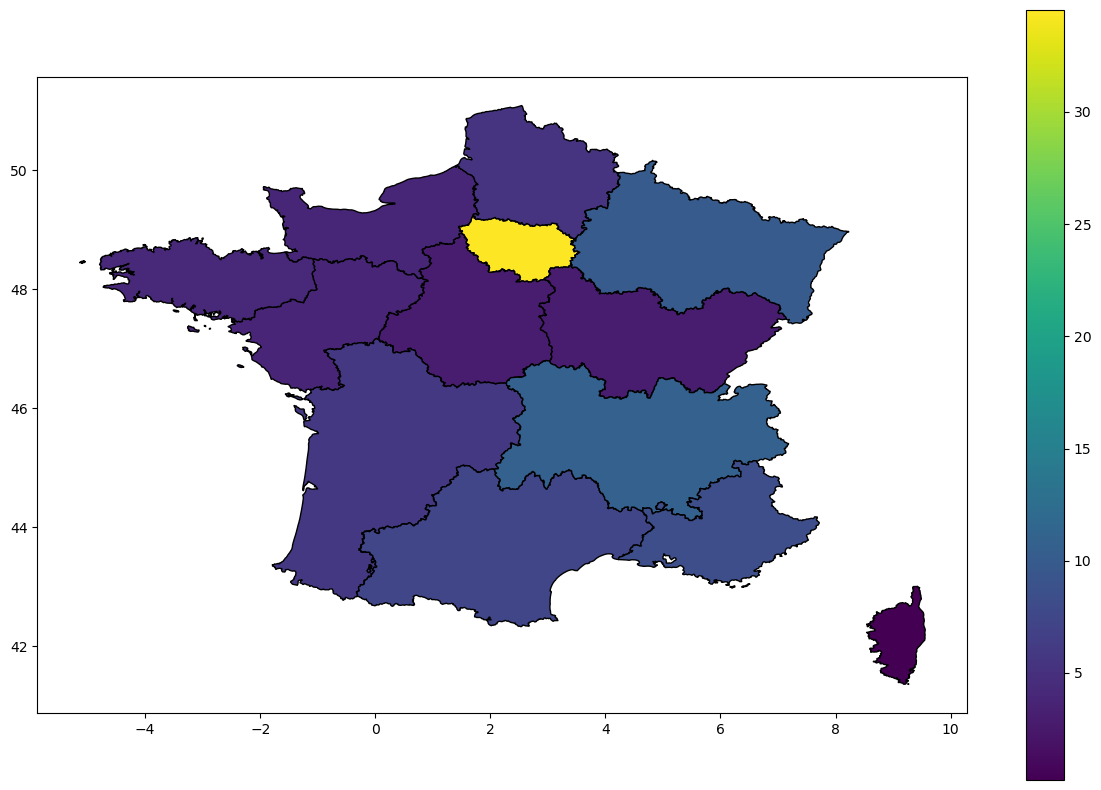

In [31]:
#Visualisation inspirée du assignment pandas questions
geograph_data = gpd.read_file('data/regions.geojson')
repart_region_df = repart_region.reset_index()
repart_region_df.columns = ["code", "percent"]

geograph_data['code'] = geograph_data['code'].astype(str)
repart_region_df['code'] = repart_region_df['code'].astype(str)

geograph_data_final = geograph_data.merge(repart_region_df, left_on="code", right_on="code", how="left")
gdf = gpd.GeoDataFrame(geograph_data_final)
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
gdf.plot(column='percent', legend=True, cmap='viridis', edgecolor='black', ax=ax)

### Par département

In [32]:
repart_depart = dpe_data_col_reg_filter["code_departement_ban"].value_counts(normalize=True)*100
#repart_depart.index.to_list()

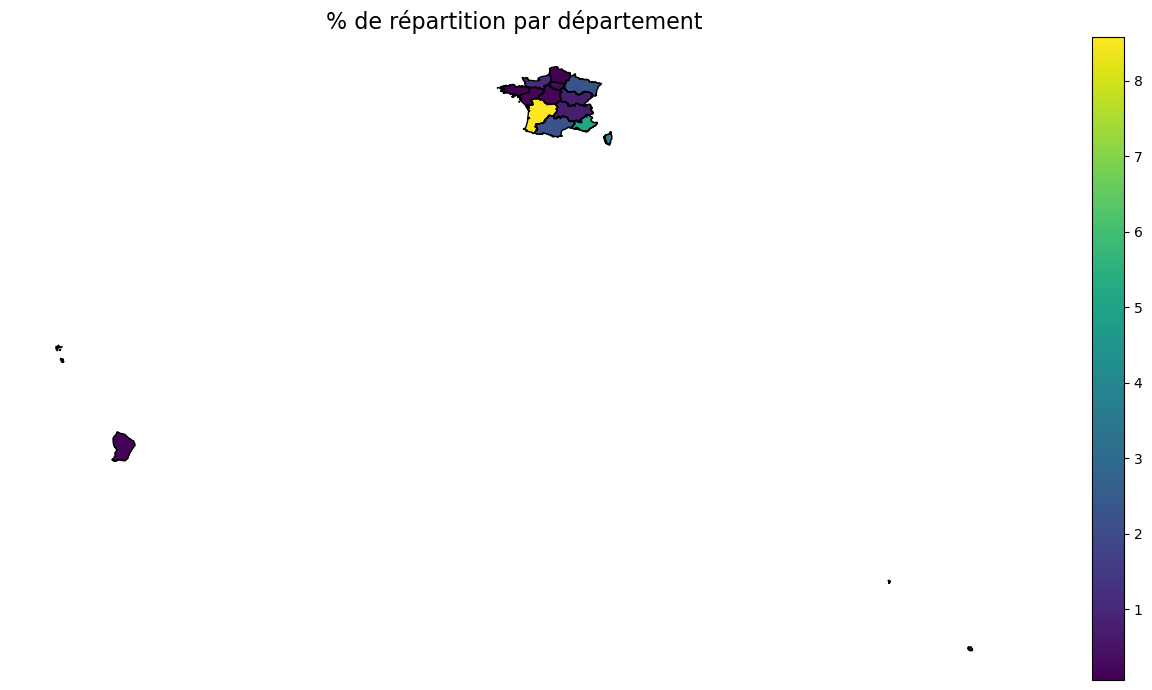

In [33]:
geograph_data_depart = gpd.read_file('data/departements.geojson')
repart_depart_df = repart_depart.reset_index()
repart_depart_df.columns = ["code", "percent"]

geograph_data['code'] = geograph_data['code'].astype(str)
repart_depart_df['code'] = repart_depart_df['code'].astype(str)

geograph_data_final_depart = geograph_data.merge(repart_depart_df, left_on="code", right_on="code", how="left")
gdf = gpd.GeoDataFrame(geograph_data_final_depart)
fig, ax = plt.subplots(1, 1, figsize=(15, 7))
gdf.plot(column='percent', legend=True, cmap='viridis', edgecolor='black', ax=ax)
ax.set_title("% de répartition par département", fontsize=16)
ax.set_axis_off()
plt.tight_layout()
plt.show()

## Focus sur l'étiquette DPE

In [34]:
repart_dpe = dpe_data_col_reg_filter["etiquette_dpe"].value_counts(normalize=True) * 100

In [35]:
dpe_colors = {
    "A": "#00A651",  
    "B": "#4CCB00",
    "C": "#A8E600",
    "D": "#FFD500",
    "E": "#FF9C00",
    "F": "#FF4E00",
    "G": "#D80000"  
}

colors = [dpe_colors[label] for label in repart_dpe.index]

In [52]:
labels_order = sorted(repart_dpe.keys())
repart_dpe= {k: repart_dpe.get(k, 0) for k in labels_order}

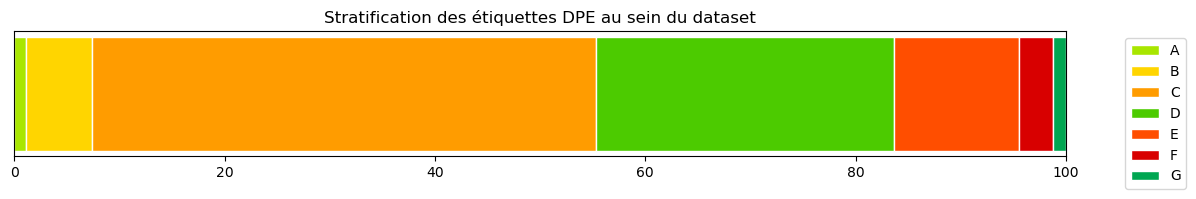

In [53]:
left = 0
plt.figure(figsize=(12,2))
for i, (etiquette, percent) in enumerate(repart_dpe.items()):
    plt.barh(0, percent, left=left, color=colors[i % len(colors)], edgecolor='white', label=etiquette)
    left += percent
plt.xlim(0, 100)
plt.yticks([])
plt.title("Stratification des étiquettes DPE au sein du dataset")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## Other characteristics

All the data is collected on appartments as they represent a larger diversity of buildings and are present all throughout the country.

In [37]:
print(dpe_data_col_reg_filter["type_batiment"].unique())

['appartement']


In [38]:
dpe_data_col_reg_filter["type_installation_chauffage"].unique()

array(['individuel', 'collectif', 'mixte (collectif-individuel)'],
      dtype=object)

# NUMERICAL DATA FOCUS

In [39]:
df_num = dpe_data_col_reg_filter.select_dtypes(include=['number'])

## Correlation matrix

/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


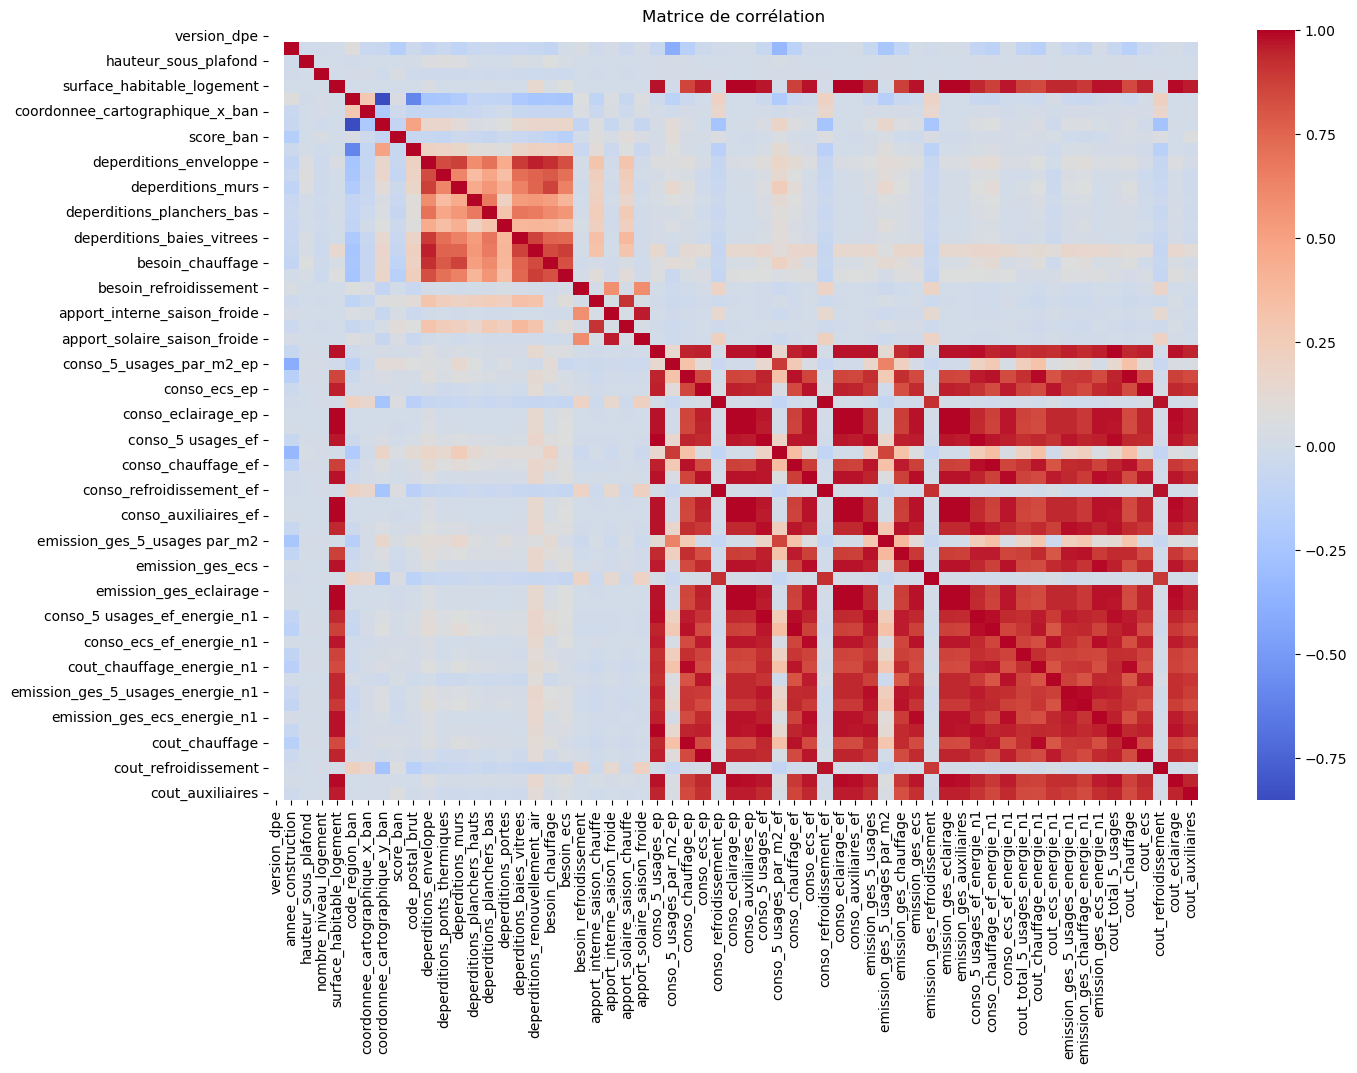

In [40]:
corr_matrix = df_num.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matrice de corrélation")
plt.show()

## Boxplots
The dataset is mainly interesting for a challenge because it mixes categorical and numerical data + the numerical data presents a lot of outliers ie decisions to be made by the candidate on how to treat them (normalisation, exclusion criteria...).

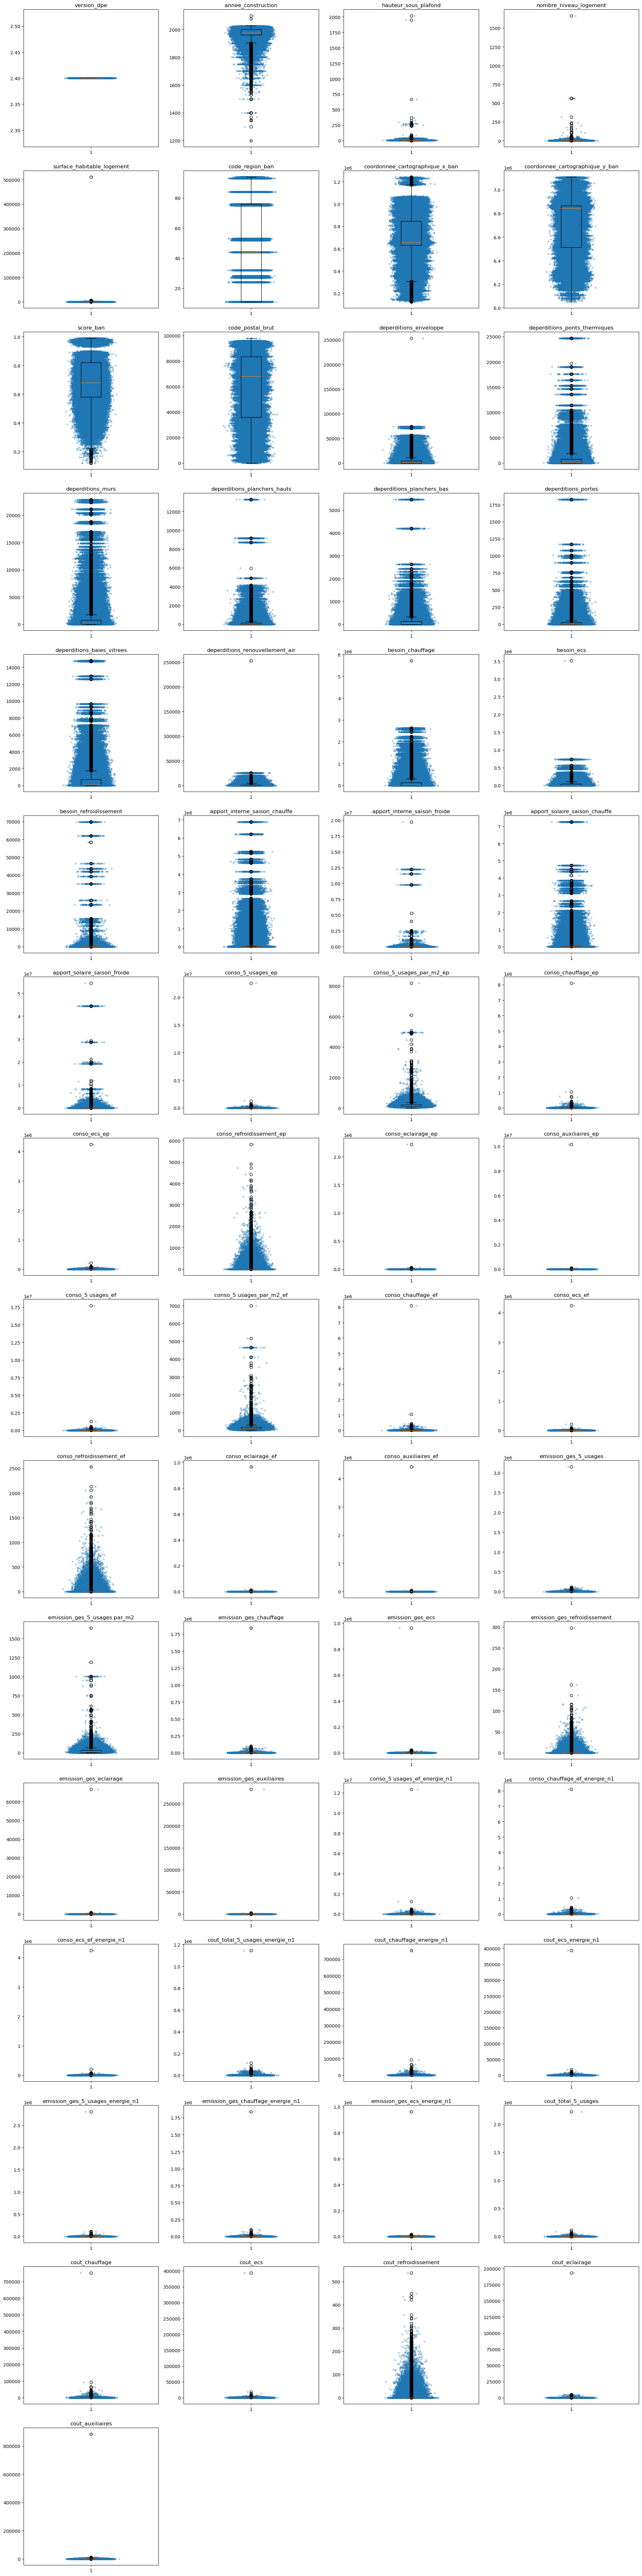

In [54]:
n_cols = 4
n_rows = math.ceil(len(df_num.columns) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5*n_rows))
axes = axes.flatten()

for i, col in enumerate(df_num.columns):
    data = df_num[col].dropna()
    axes[i].boxplot(data)
    x_jitter = np.random.normal(1, 0.04, size=len(data))
    axes[i].scatter(x_jitter, data, alpha=0.3, s=10)
    axes[i].set_title(col)

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# TRAIN/TEST SPLIT

We need to create a new stratification column since sklearn only uses one --> Some departements are empty so we need to stay at the region granularity.

In [ ]:
dpe_data_col_reg_filter["dpe_code_dep"] = (
    dpe_data_col_reg_filter["etiquette_dpe"].astype(str) + "_" + dpe_data_col_reg_filter["code_region_ban"].astype(str)
)

train_df, test_df = train_test_split(dpe_data_col_reg_filter,test_size=0.3,random_state=123,
                                     stratify=dpe_data_col_reg_filter["dpe_code_dep"]
                                    )

train_df = train_df.drop(columns=["dpe_code_dep"])
test_df = test_df.drop(columns=["dpe_code_dep"])

/var/folders/bn/gjdzyv2s1r5852w_mkv2mq5m0000gp/T/ipykernel_1978/2781510908.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dpe_data_col_reg_filter["dpe_code_dep"] = (


In [49]:
print("LEN TOTAL = ", len(dpe_data_col_reg_filter), "\nLEN TRAIN = ", len(train_df), "\nLEN TEST = ", len(test_df))

LEN TOTAL =  674121 
LEN TRAIN =  471884 
LEN TEST =  202237


## CHECKING THE DISTRIBUTIONS

In [44]:
repart_region_train = train_df["code_region_ban"].value_counts(normalize=True)*100
repart_region_test = test_df["code_region_ban"].value_counts(normalize=True)*100

In [45]:
#Visualisation inspirée du assignment pandas questions
geograph_data = gpd.read_file('data/regions.geojson')
geograph_data['code'] = geograph_data['code'].astype(str)


#TRAIN
repart_region_df_train = repart_region_train.reset_index()
repart_region_df_train.columns = ["code", "percent"]
repart_region_df_train['code'] = repart_region_df_train['code'].astype(str)
geograph_data_final_train = geograph_data.merge(repart_region_df_train, left_on="code", right_on="code", how="left")
gdf = gpd.GeoDataFrame(geograph_data_final_train)


#TEST
repart_region_df_test = repart_region_test.reset_index()
repart_region_df_test.columns = ["code", "percent"]
repart_region_df_test['code'] = repart_region_df_test['code'].astype(str)
geograph_data_final_test = geograph_data.merge(repart_region_df_test, left_on="code", right_on="code", how="left")
gdf = gpd.GeoDataFrame(geograph_data_final_test)

In [58]:
geograph_data_final_train.sort_values(by="percent", ascending=False)

,code,nom,geometry,percent
0,11,Île-de-France,"POLYGON ((1.92215 48.4576, 1.92074 48.44775, 1...",34.541964
15,84,Auvergne-Rhône-Alpes,"POLYGON ((3.36135 44.97141, 3.35453 44.95482, ...",10.692670
5,44,Grand Est,"POLYGON ((3.41479 48.39027, 3.42208 48.41334, ...",9.941850
16,93,Provence-Alpes-Côte d'Azur,"MULTIPOLYGON (((6.94833 44.65482, 6.95451 44.6...",8.353112
14,76,Occitanie,"MULTIPOLYGON (((1.78613 42.57362, 1.78094 42.5...",7.414534
8,75,Nouvelle-Aquitaine,"MULTIPOLYGON (((-1.02574 45.57469, -0.993 45.5...",5.853981
4,32,Hauts-de-France,"POLYGON ((4.14089 49.97876, 4.15398 49.97484, ...",5.374626
7,53,Bretagne,"MULTIPOLYGON (((-2.12371 48.60441, -2.13448 48...",4.101644
3,28,Normandie,"POLYGON ((-1.11962 49.35557, -1.11503 49.3624,...",3.880403
6,52,Pays de la Loire,"MULTIPOLYGON (((-2.30479 46.70942, -2.28612 46...",3.742021


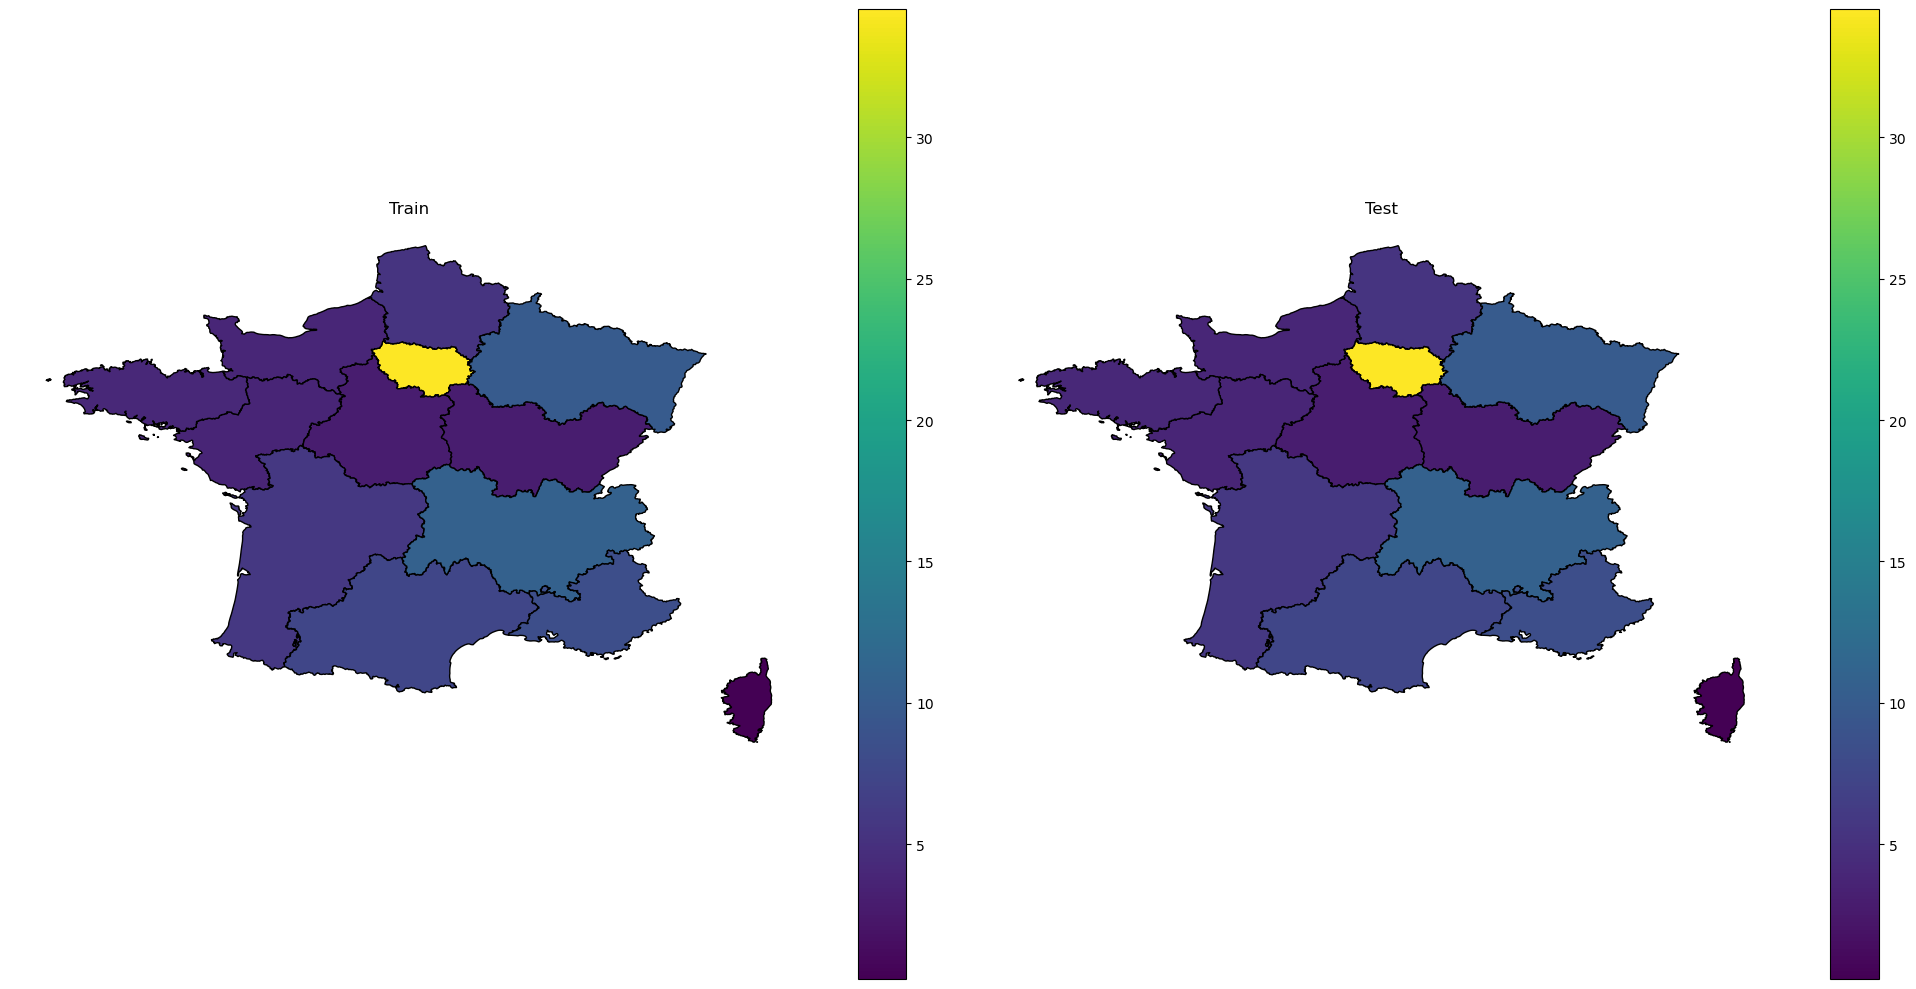

In [46]:
vmin = min(geograph_data_final_train['percent'].min(), geograph_data_final_test['percent'].min())
vmax = max(geograph_data_final_train['percent'].max(), geograph_data_final_test['percent'].max())

fig, axes = plt.subplots(1, 2, figsize=(20, 10))

geograph_data_final_train.plot(
    column='percent',
    legend=True,
    cmap='viridis',
    edgecolor='black',
    ax=axes[0],
    vmin=vmin,
    vmax=vmax
)
axes[0].set_title("Train")

geograph_data_final_test.plot(
    column='percent',
    legend=True,
    cmap='viridis',
    edgecolor='black',
    ax=axes[1],
    vmin=vmin,
    vmax=vmax
)
axes[1].set_title("Test")

for ax in axes:
    ax.axis('off')

plt.tight_layout()
plt.show()

In [50]:
repart_dpe_train = train_df["etiquette_dpe"].value_counts(normalize=True) * 100
repart_dpe_test = test_df["etiquette_dpe"].value_counts(normalize=True) * 100

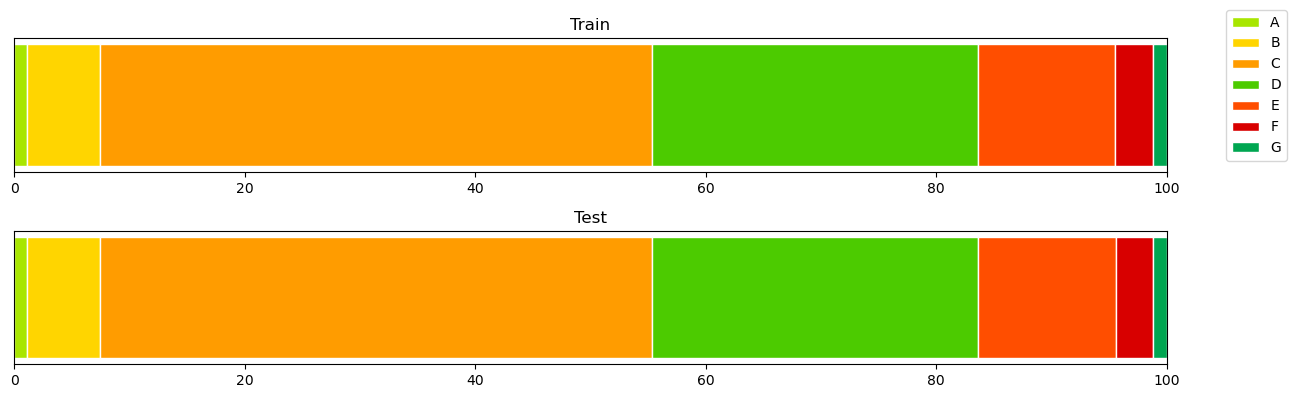

In [ ]:
labels_order = sorted(repart_dpe_train.keys())

repart_dpe_train = {k: repart_dpe_train.get(k, 0) for k in labels_order}
repart_dpe_test = {k: repart_dpe_test.get(k, 0) for k in labels_order}

fig, axes = plt.subplots(2, 1, figsize=(12, 4))

left = 0
for i, (etiquette, percent) in enumerate(repart_dpe_train.items()):
    axes[0].barh(
        0,
        percent,
        left=left,
        color=colors[i%len(colors)],
        edgecolor='white',
        label=etiquette
    )
    left += percent

axes[0].set_xlim(0, 100)
axes[0].set_yticks([])
axes[0].set_title("Train")

left = 0
for i, (etiquette, percent) in enumerate(repart_dpe_test.items()):
    axes[1].barh(
        0,
        percent,
        left=left,
        color=colors[i%len(colors)],
        edgecolor='white'
    )
    left += percent

axes[1].set_xlim(0, 100)
axes[1].set_yticks([])
axes[1].set_title("Test")

handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, bbox_to_anchor=(1.02, 1), loc='upper left')

plt.tight_layout()
plt.show()